*** Weight initialization

Xavier initialization


Learning rate= step size during GD
bath size- allows us to us SGD
1. Smaller- less representative of data
2. Larger- longer training time

*** Do good initialization and normalizaiton for ensuring no vanishing gradient occurs

*** Overfitting- L1/L2 regularization, Dropout(unique to NN), Expand your data( add noise, sound data, titlt image)

## MNIST Data

In [8]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [7]:
# Using basic approach- Softmax regression

In [9]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [11]:
mnist.train.num_examples

55000

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
image=mnist.train.images[1].reshape(28,28)


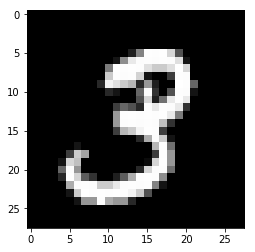

In [20]:
plt.imshow(image,cmap='gist_gray')

## Placeholders

In [21]:
x= tf.placeholder(tf.float32,shape=[None,784])

## Variables

In [22]:
#weight and biases
W= tf.Variable(tf.zeros([784,10]))
b= tf.Variable(tf.zeros([10]))


## Create Graph operations

In [23]:
z=tf.matmul(x,W)+b

# Loss Function

In [35]:
# z true value 

z_true= tf.placeholder(tf.float32,[None,10])

In [45]:
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=z_true,logits=z))

# Optimizer

In [46]:
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [47]:
train= optimizer.minimize(cross_entropy)

## Create Session

In [48]:
# initialize global variables

init= tf.global_variables_initializer()

In [49]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x,batch_y=mnist.train.next_batch(100)
        # this is hard for other exercise
        sess.run(train,feed_dict={x:batch_x,z_true:batch_y})
        
    #EVALUATE MODEL
    correct_prediction= tf.equal(tf.argmax(z,1),tf.argmax(z_true,1))
    ##[T,F,T,F,F]---> [1,0,1,0]
    accuracy= tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    # predicted[3,4] True[3,9]
    # [True,False]
    #[1.0,0.0]
    #[0.5]
    print(sess.run(accuracy,feed_dict={x:mnist.test.images,z_true:mnist.test.labels}))
    
        

0.9181


## Convolutional Neural Network

# CNN Architecture

1. LeNET5
2. AlexNet
3. googleNet
4. ResNet


Steps
1. Convolution
2. Subsampling
3. pooling
4. softmax(not always needed)

## MNIST using CNN

In [50]:
import tensorflow as tf

In [51]:
from tensorflow.examples.tutorials.mnist import input_data

In [52]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Create Functions
1. Weight initialization
2. Bias Initialization
3. CONV2D
4. Pooling

1. Weight Initialization

In [119]:
def init_weights(shape):
    init_rand_dist= tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_rand_dist)

In [120]:
def init_bias(shape):
    init_rand_bias= tf.constant(0.1,shape=shape)
    return tf.Variable(init_rand_bias)

Create a 2D convolution using builtin conv2d from TF. From those docs:
Computes a 2-D convolution given 4-D input and filter tensors.
Given an input tensor of shape [batch, in_height, in_width, in_channels] and a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels], this op performs the following:
Flattens the filter to a 2-D matrix with shape [filter_height * filter_width * in_channels, output_channels].
Extracts image patches from the input tensor to form a virtual tensor of shape [batch, out_height, out_width,
filter_height * filter_width * in_channels].
For each patch, right-multiplies the filter matrix and the image patch vector.
In [6]:


In [121]:
def conv2d(x,W):
    #x- [batch,H,W,channels]
    #W-[filter H, filter W,Channels In, Channels Out]
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
    

Create a max pooling layer, again using built in TF functions:
Performs the max pooling on the input.
Args:
  value: A 4-D `Tensor` with shape `[batch, height, width, channels]` and
    type `tf.float32`.
  ksize: A list of ints that has length >= 4.  The size of the window for
    each dimension of the input tensor.
  strides: A list of ints that has length >= 4.  The stride of the sliding
    window for each dimension of the input tensor.
  padding: A string, either `'VALID'` or `'SAME'`. 

In [122]:
def max_pool_2(x):
    #x- [batch,H,W,channels]
    #W-[filter H, filter W,Channels In, Channels Out]
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    

In [123]:
# Convolutional Layer

In [124]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [125]:
# Fully connected Layer

In [126]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [127]:
#placeholder

In [128]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [129]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [130]:
#Layers

In [131]:
x_image = tf.reshape(x,[-1,28,28,1])

In [132]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2(convo_1)

In [133]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2(convo_2)

In [134]:
# Why 7 by 7 image? Because we did 2 pooling layers, so (28/2)/2 = 7
# 64 then just comes from the output of the previous Convolution
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [135]:
# NOTE THE PLACEHOLDER HERE!
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [136]:
y_pred = normal_full_layer(full_one_dropout,10)

In [137]:
## Loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [138]:
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [139]:
# Initialize variables
init = tf.global_variables_initializer()

In [ ]:
steps = 5000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = mnist.train.next_batch(50)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels,hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.0677


Currently on step 100
Accuracy is:


KeyboardInterrupt: 